<a href="https://colab.research.google.com/github/lentin26/ml-hw4/blob/main/ML_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning HW 4

Fall 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

sns.set_style("darkgrid")

In [42]:
# read CIFAR10 dataset
from tensorflow.keras.datasets import cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [43]:
# there are 50,000 images, each 32 x 32 pixels, and each pixel with 3 RGB values
x_train.shape

(50000, 32, 32, 3)

In [67]:
print('Number of training labels:', len(set(y_train.ravel())))

Number of training labels: 10


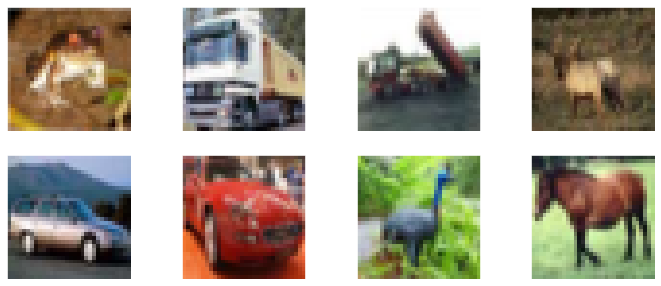

In [44]:
# these are examples of what an image looks like
fig, ax = plt.subplots(2, 4, figsize=(12, 5))
ax = ax.ravel()

# plot images
for i in range(4*2):
  # plot image
  ax[i].imshow(x_train[i])
  # hide tick labels
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

# show plot
plt.show()

Build a convolutional neural network (CNNN).

1. Convolutional Layer
2. Pooling layer
3. Fully connected layer

## Version 1 with regularization

- 1 convolutional layer
- 1 pooling layer
- 1 fully connected layer with L2 regularization

In [52]:
from tensorflow.keras.regularizers import l2

# now we can build a model
model = tf.keras.models.Sequential([
  # convolutional layer
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"),
  # pooling layer
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  # flatten 
  tf.keras.layers.Flatten(),
  # fully connected layer
  tf.keras.layers.Dense(128, activation='relu'),
  # regularization
  # tf.keras.layers.Dropout(0.2),  # drop 20% of nodes
  # fully connected layer
  tf.keras.layers.Dense(10, kernel_regularizer=l2(0.01), activation='softmax')
])

model.compile(optimizer='adam',  # optimizer
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# implement early stoppying 
# stop when validation loss doesn't improve over two consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2)

# train model
history = model.fit(x_train/255, y_train, validation_data = (x_test/255, y_test), epochs = 20, callbacks = [early_stop])
model.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5231 - accuracy: 0.4766 - val_loss: 1.2955 - val_accuracy: 0.5531
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2086 - accuracy: 0.5915 - val_loss: 1.2139 - val_accuracy: 0.5892
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0824 - accuracy: 0.6361 - val_loss: 1.1093 - val_accuracy: 0.6279
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9947 - accuracy: 0.6662 - val_loss: 1.1058 - val_accuracy: 0.6253
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9343 - accuracy: 0.6866 - val_loss: 1.0609 - val_accuracy: 0.6450
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8825 - accuracy: 0.7037 - val_loss: 1.0466 - val_accuracy: 0.6497
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8297 - accuracy: 0.7255 - val_loss: 1.0521 - val_accuracy:

[269.4261779785156, 0.48339998722076416]

In [53]:
# return model summmary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               802944    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
________________________________________________

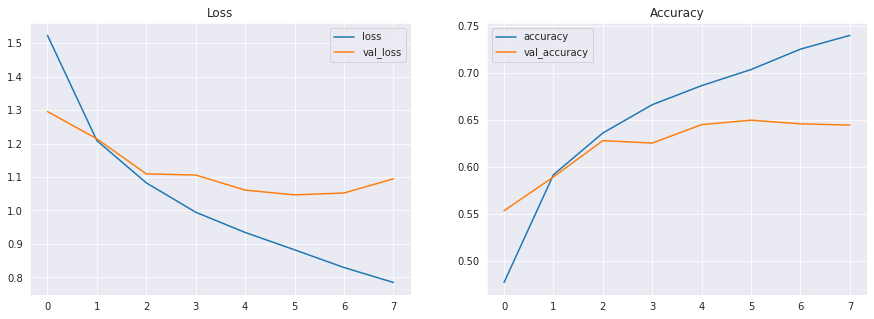

In [54]:
# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot results
metrics[["loss", "val_loss"]].plot(ax=ax[0])
metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1])

# tag and show plots
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
plt.show()

## Version 1 without regularization

- 1 convolutional layer
- 1 pooling layer
- 1 fully connected layer

In [48]:
# now we can build a model
model = tf.keras.models.Sequential([
  # convolutional layer
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"),
  # pooling layer
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  # flatten 
  tf.keras.layers.Flatten(),
  # fully connected layer
  tf.keras.layers.Dense(128, activation='relu'),
  # fully connected layer
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',  # optimizer
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# implement early stoppying 
# stop when validation loss doesn't improve over two consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2)

# train model
history = model.fit(x_train/255, y_train, validation_data = (x_test/255, y_test), epochs = 20, callbacks = [early_stop])
model.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4861 - accuracy: 0.4669 - val_loss: 1.2418 - val_accuracy: 0.5594
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1536 - accuracy: 0.5955 - val_loss: 1.1239 - val_accuracy: 0.6071
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0287 - accuracy: 0.6393 - val_loss: 1.0687 - val_accuracy: 0.6257
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9435 - accuracy: 0.6722 - val_loss: 1.0979 - val_accuracy: 0.6163
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8790 - accuracy: 0.6930 - val_loss: 1.0349 - val_accuracy: 0.6456
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8180 - accuracy: 0.7143 - val_loss: 1.0274 - val_accuracy: 0.6510
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7676 - accuracy: 0.7321 - val_loss: 1.0469 - val_accuracy:

[317.9875183105469, 0.4900999963283539]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
________________________________________________

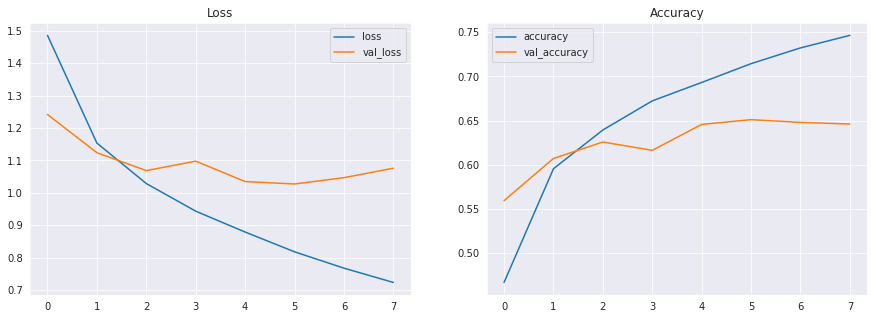

In [49]:
# return model summmary
print(model.summary())

# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot results
metrics[["loss", "val_loss"]].plot(ax=ax[0])
metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1])

# tag and show plots
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
plt.show()

Unregularized version performed slighly worse.

## Version 2 with regularization

- 1 convolutional layer
- 1 pooling layer
- 2 fully connected layers with L2 regularization

In [56]:
# now we can build a model
model = tf.keras.models.Sequential([
  # convolutional layer
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"),
  # pooling layer
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  # flatten 
  tf.keras.layers.Flatten(),
  # fully connected layer
  tf.keras.layers.Dense(128, activation='relu'),
  # fully connected layer
  tf.keras.layers.Dense(64, kernel_regularizer=l2(0.01), activation='relu'),
  # fully connected layer
  tf.keras.layers.Dense(10, kernel_regularizer=l2(0.01), activation='softmax')
])

model.compile(optimizer='adam',  # optimizer
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# implement early stoppying 
# stop when validation loss doesn't improve over two consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2)

# train model
history = model.fit(x_train/255, y_train, validation_data = (x_test/255, y_test), epochs = 20, callbacks = [early_stop])
model.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6904 - accuracy: 0.4513 - val_loss: 1.4158 - val_accuracy: 0.5356
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3278 - accuracy: 0.5604 - val_loss: 1.2635 - val_accuracy: 0.5820
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1958 - accuracy: 0.6091 - val_loss: 1.2099 - val_accuracy: 0.6000
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1100 - accuracy: 0.6376 - val_loss: 1.1378 - val_accuracy: 0.6280
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0469 - accuracy: 0.6595 - val_loss: 1.1301 - val_accuracy: 0.6305
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9942 - accuracy: 0.6793 - val_loss: 1.1104 - val_accuracy: 0.6392
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9515 - accuracy: 0.6967 - val_loss: 1.1106 - val_accuracy:

[209.0502471923828, 0.5396999716758728]

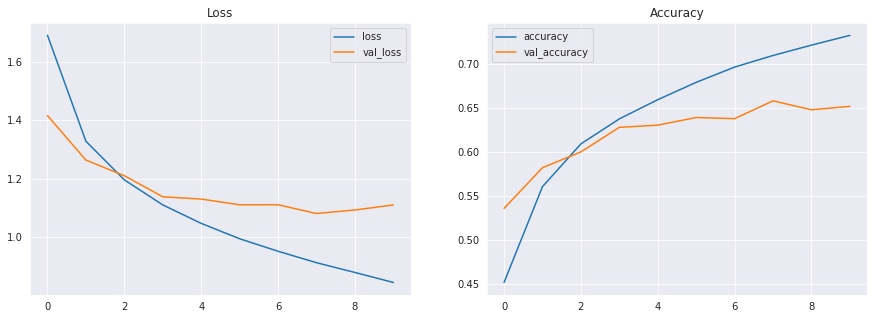

In [57]:
# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot results
metrics[["loss", "val_loss"]].plot(ax=ax[0])
metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1])

# tag and show plots
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
plt.show()

## Version 2 without regularization

- 1 convolutional layer
- 1 pooling layer
- 2 fully connected layers

In [59]:
# now we can build a model
model = tf.keras.models.Sequential([
  # convolutional layer
  tf.keras.layers.Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"),
  # pooling layer
  tf.keras.layers.MaxPool2D(pool_size = (2,2)),
  # flatten 
  tf.keras.layers.Flatten(),
  # fully connected layer
  tf.keras.layers.Dense(128, activation='relu'),
  # fully connected layer
  tf.keras.layers.Dense(64, activation='relu'),
  # fully connected layer
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',  # optimizer
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# implement early stoppying 
# stop when validation loss doesn't improve over two consecutive epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2)

# train model
history = model.fit(x_train/255, y_train, validation_data = (x_test/255, y_test), epochs = 20, callbacks = [early_stop])
model.evaluate(x_test, y_test)

Epoch 1/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4779 - accuracy: 0.4672 - val_loss: 1.2673 - val_accuracy: 0.5422
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1785 - accuracy: 0.5823 - val_loss: 1.1709 - val_accuracy: 0.5845
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0449 - accuracy: 0.6315 - val_loss: 1.0877 - val_accuracy: 0.6125
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9474 - accuracy: 0.6682 - val_loss: 1.0793 - val_accuracy: 0.6203
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8664 - accuracy: 0.6945 - val_loss: 1.0733 - val_accuracy: 0.6361
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7968 - accuracy: 0.7197 - val_loss: 1.1508 - val_accuracy: 0.6150
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 329.1716 - accuracy: 0.4601


[329.17156982421875, 0.460099995136261]

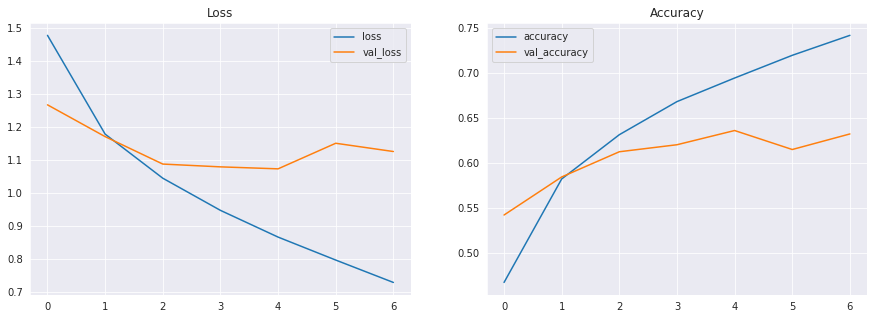

In [68]:
# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# plot results
metrics[["loss", "val_loss"]].plot(ax=ax[0])
metrics[["accuracy", "val_accuracy"]].plot(ax=ax[1])

# tag and show plots
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
plt.show()

# 2 Recurrent Neural Networkds for Language Modeling

In [2]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')

# Take a look at the first 250 characters in text
print(text[:250])

1115394/1115394 [==============================] - 0s 0us/step
Length of text: 1115394 characters
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [3]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


In [4]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [5]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [6]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [7]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

In [8]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [9]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

F
i
r
s
t
 
C
i
t
i


In [10]:
seq_length = 100

sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))

tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [11]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())

b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [12]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [13]:
dataset = sequences.map(split_input_target)
dataset

<MapDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int64, name=None), TensorSpec(shape=(100,), dtype=tf.int64, name=None))>

In [14]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [15]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [16]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [17]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

In [18]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [19]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

model.summary()

(64, 100, 66) # (batch_size, sequence_length, vocab_size)
Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  67650     
                                                                 
Total params: 4,022,850
Trainable params: 4,022,850
Non-trainable params: 0
_________________________________________________________________


In [20]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()
sampled_indices

array([47, 18, 41, 58, 59, 30,  8,  5, 56, 48, 65, 60, 56, 35, 50, 48, 46,
       14, 57, 62, 62, 46, 20, 49, 14, 24, 28, 61, 15,  9, 56, 31, 45, 51,
       36, 16, 50, 49, 30, 22, 56,  9, 14, 39, 51, 27, 54, 29, 55, 64, 33,
       63,  8, 52, 16, 33,  5, 29, 21, 48, 41, 42, 52, 61, 35, 17, 51, 52,
       11,  3, 19, 15, 49, 40,  0, 60,  2,  4, 60, 59, 27, 56,  7, 15, 24,
       46, 18, 16, 39, 48, 30, 62, 15, 29, 12, 37, 33, 62, 33, 39])

In [21]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'o our gross selves? Good, good my lord, bethink you;\nWho is it that hath died for this offence?\nTher'

Next Char Predictions:
 b'hEbstQ-&qizuqVkigArwwgGjAKOvB.qRflWCkjQIq.AZlNoPpyTx-mCT&PHibcmvVDlm:!FBja[UNK]u $utNq,BKgECZiQwBP;XTwTZ'


#### Training the model.

In [22]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)

Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.189861, shape=(), dtype=float32)


In [23]:
tf.exp(example_batch_mean_loss).numpy()

66.0136

In [24]:
model.compile(optimizer='adam', loss=loss)

In [25]:
import os 

# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [26]:
EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 12s 52ms/step - loss: 2.7426
Epoch 2/20
172/172 [==============================] - 10s 52ms/step - loss: 2.0055
Epoch 3/20
172/172 [==============================] - 10s 53ms/step - loss: 1.7242
Epoch 4/20
172/172 [==============================] - 10s 53ms/step - loss: 1.5592
Epoch 5/20
172/172 [==============================] - 10s 54ms/step - loss: 1.4584
Epoch 6/20
172/172 [==============================] - 10s 54ms/step - loss: 1.3893
Epoch 7/20
172/172 [==============================] - 11s 54ms/step - loss: 1.3356
Epoch 8/20
172/172 [==============================] - 10s 55ms/step - loss: 1.2907
Epoch 9/20
172/172 [==============================] - 11s 55ms/step - loss: 1.2493
Epoch 10/20
172/172 [==============================] - 10s 54ms/step - loss: 1.2100
Epoch 11/20
172/172 [==============================] - 10s 54ms/step - loss: 1.1700
Epoch 12/20
172/172 [==============================] - 11s 55ms/step - loss: 1.1286
E

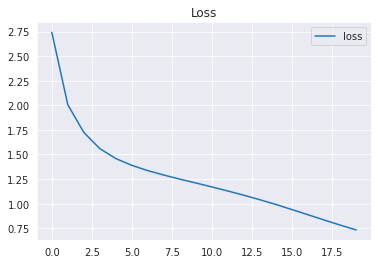

In [36]:
# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# plot results
fig = metrics[["loss"]].plot()

# tag and show plots
fig.set_title('Loss')
plt.show()

In [27]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states

In [28]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

Run it in a loop to generate some text.

In [30]:
import time 

start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
The oracle, mark what thou hast said is found
Thy soul of youth, nor frothness on mine order!
I would this, convey and springs changed,
For this poor citizens, 'pardon's force, facie issues
may fear the ballows; like ransorr'd bloody please.'
And, for my life, that if our course of all,
Which is no more of it. Here lies
The matter hath a tashion so gentleman alive;
Bid me and warrain.

CORIOLANUS:
Menenius some foundation? I do love thee too,
Against the wing and pargen And they shollow
Stall falls with our heart of sons shall serve,
As cup as more upon our househ!
The ground every cabin Bengail you think to find it shoots,
To warn the gracious queen is vain.

EDWARD:
Lord Dorset, some harbly brought to tell.

KING RICHARD II:
Farewell, if being sovereign, and myself,
Nor cheer a thousand, ranging 'd it fashion go entreaties,
Would it were allience terp'd out while a fream thine seys;
Therefore be still they up, boy. This friend of man!
Nor shinners base us no further sity is bo

Try adding another RNN layer to improve the model's accuracy

In [37]:
# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Double the number of RNN units
rnn_units = 2048

model2 = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

In [40]:
model2.compile(optimizer='adam', loss=loss)

EPOCHS = 20
history2 = model2.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Epoch 1/20
172/172 [==============================] - 39s 176ms/step - loss: 2.7034
Epoch 2/20
172/172 [==============================] - 30s 169ms/step - loss: 1.9040
Epoch 3/20
172/172 [==============================] - 31s 174ms/step - loss: 1.6297
Epoch 4/20
172/172 [==============================] - 31s 172ms/step - loss: 1.4690
Epoch 5/20
172/172 [==============================] - 32s 172ms/step - loss: 1.3677
Epoch 6/20
172/172 [==============================] - 31s 171ms/step - loss: 1.2900
Epoch 7/20
172/172 [==============================] - 31s 173ms/step - loss: 1.2180
Epoch 8/20
172/172 [==============================] - 31s 171ms/step - loss: 1.1439
Epoch 9/20
172/172 [==============================] - 31s 173ms/step - loss: 1.0619
Epoch 10/20
172/172 [==============================] - 31s 173ms/step - loss: 0.9690
Epoch 11/20
172/172 [==============================] - 31s 172ms/step - loss: 0.8644
Epoch 12/20
172/172 [==============================] - 31s 174ms/step - lo

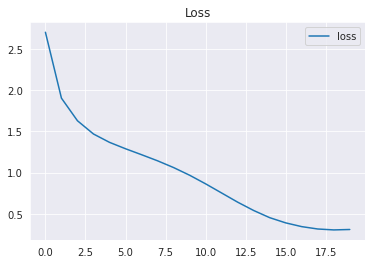

In [41]:
# plot loss and accuracy
metrics = pd.DataFrame(history.history)

# plot results
fig = metrics[["loss"]].plot()

# tag and show plots
fig.set_title('Loss')
plt.show()

Doubling the number GRUs from 1024 to 2068 decreased the loss (over 20 epochs) by a factor greater than 2 from 0.73 to 0.31.

In [69]:
import time 

start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

ROMEO:
What say you, Kill not make you in thy names?

Nurse:
Marry, for us your plories,
And all things never made me say himself.
If not, so, and you, my noble cousin
shall I ack inconstant to delicersy testable?

HORTENSIO:
I am a purpote glass. If not, I pray you, fie, as they say,
I had cursed by some death or redew
From bound to put whose bids thou lies with tears;
And bow'd upon the head of Ruchard here;
And, proud, I thank thee go, to look into his work;
The which where he is burded, Norfolk butchers,
Over melence, whister our office
By that our house, he had not been a
man't--love-back with me to wail your wrongs; and I
Rickle in me. Boldla, beg one
once more to grant their tender and twice doubt,
besides he make way next with this oath kindly.

MENENIUS:
As I told her mad, so smell our fierded pride
For ever yield thee our loss.

First Servingman:
What, you may I appear with you.

LUCIO:
I am sorry for my eyes with one talk.

KING EDWARD IV:
Be love that even say.

PERDITA:
O 